<a href="https://colab.research.google.com/github/kferrel-shp/Project_Codes/blob/main/TestRunWihRealData_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
import io
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler
!pip install kneed
from kneed import KneeLocator

##Load data and convert so pandas can read the upload

In [ ]:
# upload the excel file
uploaded = files.upload()

# get the actual name of the file from the above upload code
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")

Saving 487_watersheds_forkmeans.xlsx to 487_watersheds_forkmeans (9).xlsx
Uploaded file: 487_watersheds_forkmeans (9).xlsx


In [ ]:
# use the uploaded file name to access the uploaded data
data = pd.ExcelFile(io.BytesIO(uploaded[file_name]))

In [ ]:
# Display the name of the sheets
#print(data.sheet_names)
# Display the first few rows to understand its structure
print(data.parse('Sheet3').head())

  Watershed Names  Area (sqkm)  2021  2030_high     Change
0    150503030502       123.04    10         48  30.884265
1    150503050102        55.33     0          0   0.000000
2    150503060401        70.89     0          0   0.000000
3    150701020702       119.50     5         11   5.020921
4    Abbot Canyon        83.69     0          0   0.000000


In [ ]:
# Load the data from the specified sheet
df = data.parse('Sheet3')

scenario = '2030_high'
no_underscore = '2030 high'
decade= '2030'
# Extract the columns of interest for clustering
data_for_clustering = df[[scenario, 'Change']]


##Standardizing the data

Suppose you have two features:

2030 Area: Values in thousands (e.g., 5000 sqkm).

Percent Change: Values typically between 0% and 100%.

Without standardization, the feature with larger values (2030 Area) will heavily influence the clustering results, overshadowing the impact of percent change.

If one feature has values ranging from 1 to 1000, and another ranges from 0 to 100, the clustering will be biased toward the feature with the larger range.

In [ ]:
# Standardize the data
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(data_for_clustering)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

The elbow method is a technique for selecting the optimal number of clusters (k) in K-means clustering. It involves plotting the inertia (sum of squared distances of points to their nearest cluster center) for different values of k and identifying the "elbow point," where the rate of decrease sharply slows down.

##Identify the optimal number of clusters, or k values

The optimal number of clusters is: 4


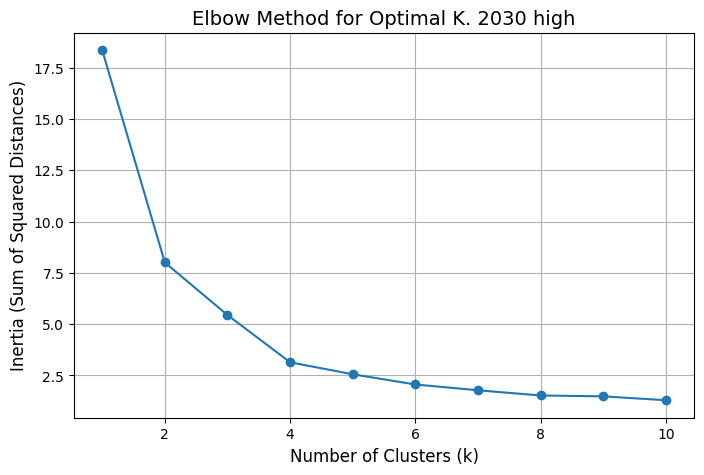

In [ ]:
# Determine the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 11)  # Test k from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
knee_locator = KneeLocator(k_values, inertia, curve='convex', direction='decreasing')
optimal_k = knee_locator.elbow
print(f"The optimal number of clusters is: {optimal_k}")

# Plot the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title(f'Elbow Method for Optimal K. {no_underscore}', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=12)
plt.grid(True)
plt.show()

#Set up the K-Means analysis

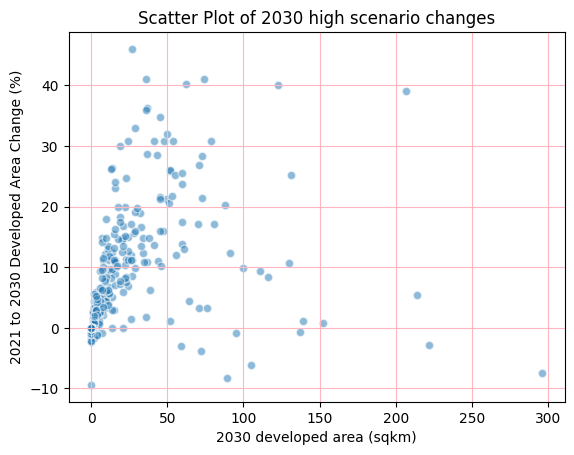

In [ ]:
# read excel file, make sure sheet name is correct
data_df = data_for_clustering #pd.read_excel(file_name, sheet_name= 'Sheet3')

# plot data
plt.scatter(data_df[scenario], data_df['Change'], alpha=.5, edgecolor='w')
plt.xlabel(f'{decade} developed area (sqkm)')
plt.ylabel(f'2021 to {decade} Developed Area Change (%)')
plt.title(f'Scatter Plot of {no_underscore} scenario changes')
plt.grid(True,color='lightpink')
plt.show()

In [ ]:
# define how many clusters I want to identify
kmeans = KMeans(n_clusters=4, random_state=42)
# apply kmeans to the scaled data
data_df['Cluster'] = kmeans.fit_predict(scaled_data)

<ipython-input-311-d2713a2c29fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Cluster'] = kmeans.fit_predict(scaled_data)


In [ ]:
#setting cluster labels
labels = kmeans.labels_

#identify the coordinates of centroids
centroids = kmeans.cluster_centers_

#print the centroids coordinates
print("centroid coordinates: ", centroids)

centroid coordinates:  [[0.007919   0.18112345]
 [0.08809489 0.39052865]
 [0.49532225 0.19699515]
 [0.18286556 0.69724926]]


In [ ]:
print(df[scenario].min())  # Print minimum value
print(df[scenario].max())  # Print maximum value

0
296


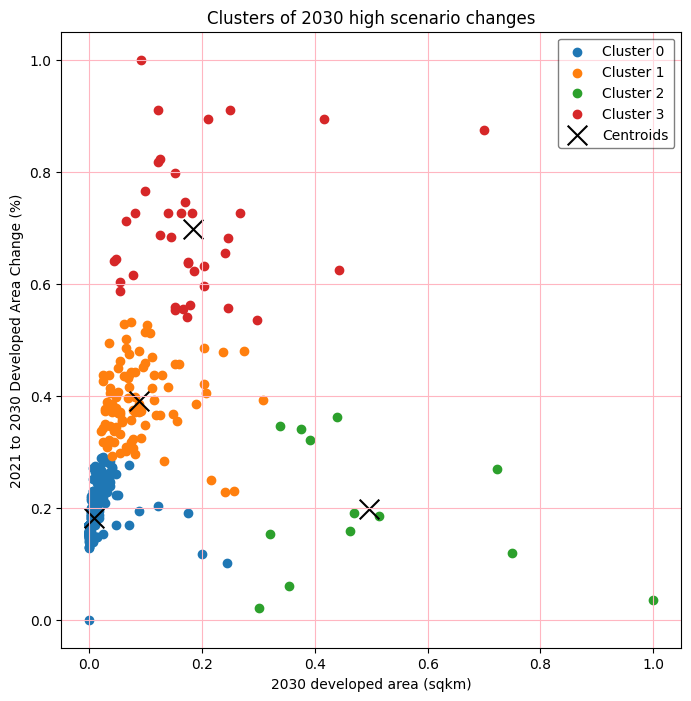

In [ ]:
# use this if cluster color matches 2060 low


# figure size
plt.figure(figsize=(8,8))



# put each point on a scatter plot using a loop

for i in range(kmeans.n_clusters):
    # choose the points that belong to the current cluster
    cluster_points = scaled_data[labels==i]
    #plotting cluster 1 (0), cluster 2 (1), and so on
    # "label =.." denotes which point is associated to which cluster
    plt.scatter(cluster_points[:,0], cluster_points[:,1],label = f'Cluster {i}')


plt.scatter(centroids[:,0], centroids[:,1], s=200, c='black', marker='x', label='Centroids')
plt.title(f'Clusters of {no_underscore} scenario changes')
plt.xlabel(f'{decade} developed area (sqkm)')
plt.ylabel(f'2021 to {decade} Developed Area Change (%)')
plt.grid(True,color='lightpink')


legend = plt.legend(frameon=True, edgecolor='black')
legend.get_frame().set_alpha(0.5) #makes legend transparent


plt.show()

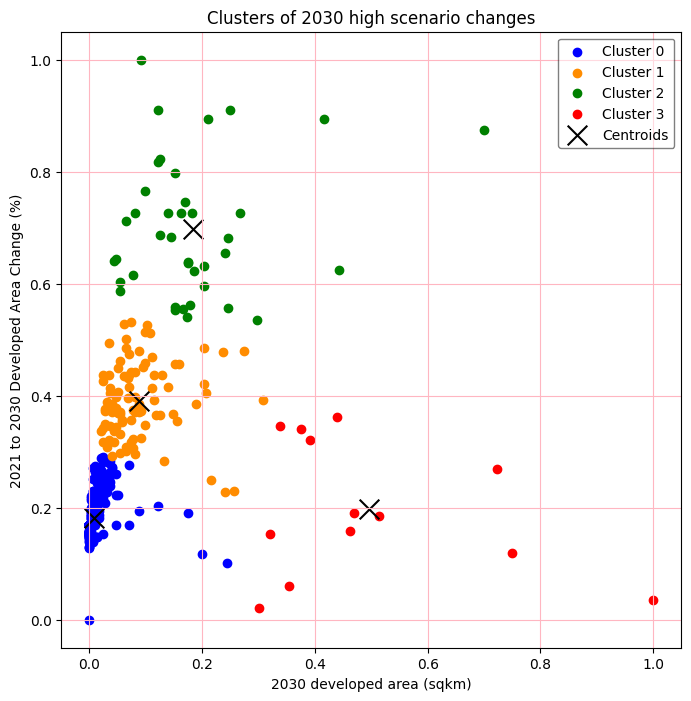

In [ ]:
# use this if color doesn't match 2060 low

# figure size
plt.figure(figsize=(8,8))

cluster_labels = {
    3: 2,#1,  # Cluster 3 labeled as 1
    1: 1,#2,  # Cluster 1 labeled as 2
    2: 3,  # Cluster 2 labeled as 3
    0: 0  # Cluster 0 labeled as 0
}

# Color and label mapping
cluster_colors = {
    3: 'green',#'darkorange',  #3 Cluster 3 (labeled as 1) - Orange
    1: 'darkorange',#'green',   # Cluster 1 (labeled as 2) - Green
    2: 'red',#red',     # Cluster 2 (labeled as 3) - Red
    0: 'blue'    # Cluster 0 (labeled as 0) - Default blue
}

# put each point on a scatter plot using a loop
for i in range(kmeans.n_clusters):
    cluster_points = scaled_data[labels == i]

    # Get color and label from mapping
    color = cluster_colors.get(i, 'blue')  # Default to blue if not found
    label_num = cluster_labels.get(i, i)  # Default to original cluster number if not found

    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                label=f'Cluster {label_num}', color=color)

plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='x', label='Centroids')
plt.title(f'Clusters of {no_underscore} scenario changes')
plt.xlabel(f'{decade} developed area (sqkm)')
plt.ylabel(f'2021 to {decade} Developed Area Change (%)')
plt.grid(True, color='lightpink')


# Rearrange legend order
legend_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Centroids']  # Desired order
handles, labels = plt.gca().get_legend_handles_labels()  # Get existing handles and labels
# Create a dictionary mapping labels to handles
label_to_handle = dict(zip(labels, handles))
# Get handles in desired order
ordered_handles = [label_to_handle[label] for label in legend_labels]

legend = plt.legend(ordered_handles, legend_labels, frameon=True, edgecolor='black')
legend.get_frame().set_alpha(0.5)  # Makes legend transparent

plt.show()
#legend = plt.legend(frameon=True, edgecolor='black')
#legend.get_frame().set_alpha(0.5)  # Makes legend transparent

plt.show()

for more help
https://github.com/Sid2202/aventus/commit/eaa35fcacef2ae4ee53186a455de814dcc5e3487

#Identify the watersheds associated with each of the culsters

In [ ]:
#                          THIS DIDN'T WORK HOW I WANTED IT TO
#                                   DO NOT USE!




#'Watershed Names' is the column with watershed names in DataFrame
#cluster_mapping = pd.Series(df['Watershed Names'].values, index=data_df['Cluster']).to_dict()

#print(cluster_mapping)

# Example: Get watershed names for cluster 1
#watersheds_in_cluster_1 = cluster_mapping.get(0)  # Cluster labels usually start from 0
#print(f"Watersheds in Cluster 1: {watersheds_in_cluster_1}")

#Iterating through the dictionary to print all the clusters and corresponding watershed names
#for cluster, watersheds in cluster_mapping.items():
    #print(f"Cluster {cluster}: {watersheds}")



#                          THIS DIDN'T WORK HOW I WANTED IT TO
#                                   DO NOT USE!

In [ ]:
# create dictionary that stores watershed name by cluster number
cluster_mapping = defaultdict(list)


# loop through each row in data_df and provide the row number and cluster value for each iteration
print(data_df.head())
for index, cluster in enumerate(data_df['Cluster']):
    cluster_mapping[cluster].append(df.loc[index, 'Watershed Names'])

for cluster, watersheds in cluster_mapping.items():
    print(f"Cluster {cluster}: {watersheds}")

   2030_high     Change  Cluster
0         48  30.884265        3
1          0   0.000000        0
2          0   0.000000        0
3         11   5.020921        0
4          0   0.000000        0
Cluster 3: ['150503030502', 'Airport Wash', 'Bisbee-Douglas International Airport-Whitewater Draw', 'Buffalo Tank-Santa Cruz River', 'Calabasas Canyon-Santa Cruz River', 'Canada Agua', 'City of Marana-Santa Cruz River', 'Daggs Wash', 'Fort McDowell-Verde River', 'Fourmile Wash', 'Galloway Wash-Cave Creek', 'Guevavi Canyon-Santa Cruz River', 'Kinney Tank-Santa Cruz River', 'Lone Butte Ranch-Gila River', 'Lower Canada del Oro', 'Lower Pantano Wash', 'Lower Rincon Creek', 'Lower Sonoita Creek', 'Luke Wash', 'McDowell Mountains', 'McDowell Pass-Verde River', 'Middle Skunk Creek', 'Middle Tanque Verde Wash', 'North Branch Santa Cruz Wash', 'Peyron Tank', 'Pinnacle Peak-Paradise Valley', 'Rock Tank-Cave Creek', 'Rodeo Wash-Santa Cruz River', 'Ruelas Canyon-Santa Cruz River', 'Saddle Gap', 'Sawik M

In [ ]:
#                          THIS DIDN'T WORK HOW I WANTED IT TO
#                                   DO NOT USE!




# create another dictionary
#cluster_data=defaultdict(list)

# restructure the data to have columns as clusters and rows as watershed names


# this will make the data appear as:
#           watershed names |   Cluster
#           example 1       |     1
#           example 2       |     2
#           example 3       |     3


# go to the cluster_mapping dictionary and append watershed name and cluster number to cluster_data dictionary
#for cluster, watersheds in cluster_mapping.items():
    #for watershed in watersheds:
        #cluster_data['Watershed Names'].append(watershed)
        #cluster_data['Cluster'].append(cluster)

# Create a DataFrame from the restructured data
# this will convert the cluster_data dictionary from the original tabular format to
# colums called 'Watershed Name' and 'Cluster'
#cluster_df = pd.DataFrame(cluster_data)
#print(cluster_df)


#                          THIS DIDN'T WORK HOW I WANTED IT TO
#                                   DO NOT USE!

In [ ]:
cluster_data_list = []
for cluster, watersheds in cluster_mapping.items():
    for watershed in watersheds:
        cluster_data_list.append({'Watershed Names': watershed, 'Cluster': cluster})

In [ ]:
# Create a DataFrame from the cluster_mapping dictionary
cluster_df = pd.DataFrame(cluster_data_list)
print(cluster_df)

# Export the DataFrame to an Excel file
cluster_df.to_excel('2030_high_ws_4clusters.xlsx', index=False)#, sheet_name='Mapping')

                                       Watershed Names  Cluster
0                                         150503030502        3
1                                         Airport Wash        3
2    Bisbee-Douglas International Airport-Whitewate...        3
3                        Buffalo Tank-Santa Cruz River        3
4                    Calabasas Canyon-Santa Cruz River        3
..                                                 ...      ...
482                             Lower Indian Bend Wash        2
483                         Tempe Town Lake-Salt River        2
484                             Upper Indian Bend Wash        2
485                                Upper Rillito River        2
486                       White Tank Number Three Wash        2

[487 rows x 2 columns]
